In [266]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import re
from gensim.models import Word2Vec
import gensim.downloader as api
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from spacy import displacy
import spacy
spacy.require_gpu()
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ajays\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Using Spacy

In [267]:
nlp = spacy.load('en_core_web_sm')

c:\Users\ajays\anaconda3\envs\py311_cuda_env\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.8.0) was trained with spaCy v3.8.0 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [268]:

def clean_and_split_paragraph(paragraph):
    
    if not paragraph:
        return []

    cleaned_paragraph = re.sub(r"[^\S\r\n]+", " ", paragraph)  
    cleaned_paragraph = cleaned_paragraph.replace('\xa0', ' ') 
    cleaned_paragraph = cleaned_paragraph.strip() 

    lines = cleaned_paragraph.splitlines()
    cleaned_lines = [line.strip() for line in lines if line.strip()]  

    return cleaned_lines

In [269]:
def extract_entities(note):
   tokens = nlp(note).ents  
   result=[]
   for token in tokens:
      print(token.text, token.start_char, token.end_char, token.label_)
      result.append([token.text, token.start_char, token.end_char, token.label_])
   print('----------------------------------------------------------------------------')
   return result

In [270]:
def fetch_entities(notes):
    if isinstance(notes, list)==False:
        return extract_entities(notes)
    else:
        result=[]
        for note in notes:
            result.append(extract_entities(note))
        return result

In [271]:
def extract_corpus(note):
   tokens = nlp(note).ents  
   result=[]
   for token in tokens:
      if token.text is not None and token.text!='':
         result.append(token.text)
   return result

In [272]:
def fetch_corpus(notes):
    corpus = []
    if isinstance(notes, str):
        note=notes
        entity_data=extract_corpus(note)
        if entity_data is not None:
                return entity_data
        else:
             return None
    for notes_data in notes:  
        str_tokens = set()
        for note in notes_data:
            entity_data=extract_corpus(note)
            if entity_data is not None:
                str_tokens.update(entity_data)
        if str_tokens: 
            corpus.append(str_tokens)  
    return corpus


In [273]:
def extract_passage_by_label(text, label):
    pattern = re.compile(rf'{label}:\s*(.*?)\s*(?:\n\n|$)', re.IGNORECASE | re.DOTALL)
    match = pattern.search(text)
    if match:
        return match.group(1).strip()
    return None

In [274]:
def do_data_process(df,label='Past Medical History'):
    label_df=[]
    for data in df:
        passage=extract_passage_by_label(data, label)
        if passage is not None:
            print(passage)
            label_df.append(passage)
        len(label_df)
    return label_df

In [275]:
def tsne_plot(model, words, preTrained=False):
    labels = []
    tokens = []

    for word in words:
        if preTrained:
            tokens.append(model[word])
        else:
          tokens.append(model.wv[word])

        labels.append(word)

    tokens = np.array(tokens)

    perplexity = min(30, len(tokens) - 1)

    tsne_model = TSNE(perplexity=perplexity, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(45, 54))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',
                     fontsize=18)
    plt.show()



In [276]:
notes_df = pd.read_csv("nlp_med_notes.csv")['text']
notes=[]
for notes_data in notes_df: 
    notes.append(clean_and_split_paragraph(notes_data))

In [277]:
def visualize_entities(label_df):
    doc = []
    for data in label_df:
        doc = nlp(data)  
        displacy.render(doc, style="ent", jupyter=True)
        print("****************************************************************************************************")

In [278]:
df =pd.read_csv("nlp_med_notes.csv")['text']
label_df=do_data_process(df,'PAST MEDICAL HISTORY')
# label_df=df
visualize_entities(label_df)

Hepatitis C genotype 1A complicated by
cirrhosis, esophageal varices, encephalopathy and presumptive
SBP.  Type 2 diabetes.  Obesity.  Hypertension.  Asthma.
Esophageal candidiasis.  Gastroparesis.  Depression.  Status
post cholecystectomy.  Status post seven spur surgeries.
Hypothyroidism.  Amenorrhea.  Migraines.
PmHx:
HCV genotype IA refractory to IFN x 2 ascites
grade I esophageal varices (EGD [**11-1**])
h/o esophageal candidiasis
s/p ccx
DM II
HTN
asthma
hypothyroid
depression
amenorrhea
migraines
1.  Hypertension.
2.  History of hepatitis C; on pegylated interferon and
ribavirin study.  The patient quit three months ago for
unknown reasons.
3.  Dyspepsia/peptic ulcer disease.
4.  Diabetes; per OMR but the patient denies.
5.  Depression; no prior suicide attempts with few years of
treatment.
6.  Renal stones; status post renal surgery with blood
transfusions in the [**2139**].
7.  History of angina.
8.  Chronic back pain; status post surgery.
CAD, status post CABG with an EF of 2

****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


c:\Users\ajays\anaconda3\envs\py311_cuda_env\Lib\site-packages\spacy\displacy\__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


In [279]:


df =pd.read_csv("nlp_med_notes.csv")['text']
label_df=do_data_process(df,'REVIEW OF SYSTEMS')

for data in label_df:
    doc = nlp(data)  
    sentence_spans = list(doc.sents) 
    displacy.render(sentence_spans, style="dep", jupyter=True)
print('*********************************************************************************************************************************************************************')

Pertinent for chronic nausea for weeks
with intermittent vomiting.
She denies any orthopnea, lower extremity
edema, but she does acknowledge that she does have
dysmenorrhea.
Pain assessment on arrival to the floor: 0/10
(no pain). No recent illnesses. No fevers, chills, or night
sweats. Appetite is good and weight is stable. No SOB, new
cough.  She has chronic angina that typically occurs when she
wakes up or sometimes at night time after a busy day, relieved
with 1 SLNG, this is stable but frequent (sometimes takes SLNG
daily).  No PND or orthopnea. No urinary symptoms. No LE edema.
No skin changes. No arthralgias or joint swelling. Other systems
reviewed in detail and all otherwise negative.
Negative unless otherwise stated above.


*********************************************************************************************************************************************************************


In [280]:
df =pd.read_csv("nlp_med_notes.csv")['text']
label_df=do_data_process(df,'MEDICATIONS')

1.  Flovent two puffs b.i.d.
2.  Albuterol one to two puffs q.six hours p.r.n.
3.  Serevent one puff b.i.d.
4.  Synthroid 100 mcg q.d.
5.  Protonix 40 mg q.d.
6.  Levaquin 250 mg q.d.
7.  Lactulose 30 ml p.o. t.i.d.
8.  Lasix 40 mg p.o. q.d.
9.  Reglan 10 mg p.o. q.i.d.
10. Aldactone 25 mg p.o. b.i.d.
N/A
1. Ranitidine 150 mg [**Hospital1 **].
2. Simvastatin 40 mg once daily.
3. Ferrous sulfate 325 mg once daily.
4. Ascorbic acid 500 mg [**Hospital1 **].
5. Zinc sulfate 220 mg once daily.
6. Aspirin 81 mg once daily.
7. Erythromycin ophthalmic ointment [**Hospital1 **].
8. Colace 100 mg [**Hospital1 **].
9. Metoprolol XL 100 mg once daily.
10.Glargine 24 units q at bedtime.
11.Humalog insulin sliding scale q ac and at bedtime.
12.Lasix 20 mg once daily.
13.Potassium chloride 20 mEq once daily.
14.Amiodarone 400 mg [**Hospital1 **] x 1 week, then 400 mg once daily x 1
week, then 200 mg once daily.
15.Oxacillin 2 grams q 4 h through [**12-28**].
16.Warfarin as directed to maintain a targ

In [281]:
df =pd.read_csv("nlp_med_notes.csv")['text']
label_df=do_data_process(df,'MEDICATIONS')

1.  Flovent two puffs b.i.d.
2.  Albuterol one to two puffs q.six hours p.r.n.
3.  Serevent one puff b.i.d.
4.  Synthroid 100 mcg q.d.
5.  Protonix 40 mg q.d.
6.  Levaquin 250 mg q.d.
7.  Lactulose 30 ml p.o. t.i.d.
8.  Lasix 40 mg p.o. q.d.
9.  Reglan 10 mg p.o. q.i.d.
10. Aldactone 25 mg p.o. b.i.d.
N/A
1. Ranitidine 150 mg [**Hospital1 **].
2. Simvastatin 40 mg once daily.
3. Ferrous sulfate 325 mg once daily.
4. Ascorbic acid 500 mg [**Hospital1 **].
5. Zinc sulfate 220 mg once daily.
6. Aspirin 81 mg once daily.
7. Erythromycin ophthalmic ointment [**Hospital1 **].
8. Colace 100 mg [**Hospital1 **].
9. Metoprolol XL 100 mg once daily.
10.Glargine 24 units q at bedtime.
11.Humalog insulin sliding scale q ac and at bedtime.
12.Lasix 20 mg once daily.
13.Potassium chloride 20 mEq once daily.
14.Amiodarone 400 mg [**Hospital1 **] x 1 week, then 400 mg once daily x 1
week, then 200 mg once daily.
15.Oxacillin 2 grams q 4 h through [**12-28**].
16.Warfarin as directed to maintain a targ

In [282]:
corpus=[]
for data in label_df:
    corpus.append(fetch_corpus(data))
print(list(corpus))

[['1', 'two', '2', '3', '4', '100', 'mcg q.d.\n', '5', '40', '6', 'Levaquin', '250', '7', 'Lactulose', '30', '8', 'Lasix 40', 'q.d.\n', '9', 'Reglan 10', '10', 'Aldactone 25'], [], ['1', '2', 'Simvastatin', '3', '325', '4', '500', '5', '220', '6', '81', '7', '8', '100', '9', '10.Glargine 24', '11.Humalog', 'ac', '12.Lasix 20', '13.Potassium chloride', '1 week', '400', '1\nweek', '200', '15.Oxacillin 2 grams', '4', '12-28', '16.Warfarin', 'INR', '2', '2.5', '4 days ago - 3', '5', '5', '5', '4', '2032-11-29**].Albuterol'], ['1', '5', 'Tablet', '0.5', 'Tablet PO BID', '2', 'Tablet(s', '2', 'Simvastatin', 'Tablet', 'One', '1', 'Tablet PO DAILY', 'Tablet(s', '3', '100', 'One', '1', '2', '1 months', 'Capsule(s', '4', '81', 'Tablet', 'Delayed Release', 'One', '1', 'Tablet', 'Delayed Release', 'PO DAILY', 'Tablet', 'Delayed Release', '5', '150', 'Tablet', 'One', '1', 'Tablet PO BID', '2', '1 months', 'Tablet(s', '6', '20', 'Tablet', 'One', '1', 'Tablet PO BID', '2', 'a\nday', '5 days', 'Tablet

In [283]:
model = Word2Vec(corpus, min_count=1)
model.wv['Levaquin']

array([-8.0054915e-03,  7.4143484e-03,  6.6357716e-03, -3.0378506e-03,
        1.0081192e-03, -1.4979597e-03,  2.9943984e-03,  3.5603370e-03,
       -7.3947278e-03,  3.3421146e-03,  5.3058406e-03, -2.9773701e-03,
       -4.0389923e-03,  4.7824946e-03, -3.5492356e-03, -3.0065218e-03,
        5.4337196e-03, -3.7239154e-03, -9.9426173e-03,  1.6085434e-03,
       -7.1787727e-03, -5.8754552e-03,  1.0346927e-02,  4.4112485e-03,
        7.1388199e-03, -8.7877624e-03, -1.2236499e-03, -9.9143470e-03,
        3.6450804e-03, -6.6963504e-03,  8.9555159e-03,  3.2284337e-03,
       -3.9212229e-03,  7.9252699e-05,  5.8294022e-03, -1.6849355e-03,
       -4.4423817e-03, -8.2286103e-03,  6.3150488e-03,  8.2864454e-03,
        4.9056672e-03, -6.0438095e-03,  5.1379576e-03, -6.2964490e-04,
       -9.1015799e-03, -5.8893492e-03,  3.4052336e-03, -1.0634188e-03,
       -4.6573309e-03, -2.7274280e-03, -5.6674955e-03, -3.5130917e-03,
        1.2219811e-03, -1.0099035e-03, -2.1060978e-03, -7.5800503e-03,
      

c:\Users\ajays\anaconda3\envs\py311_cuda_env\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


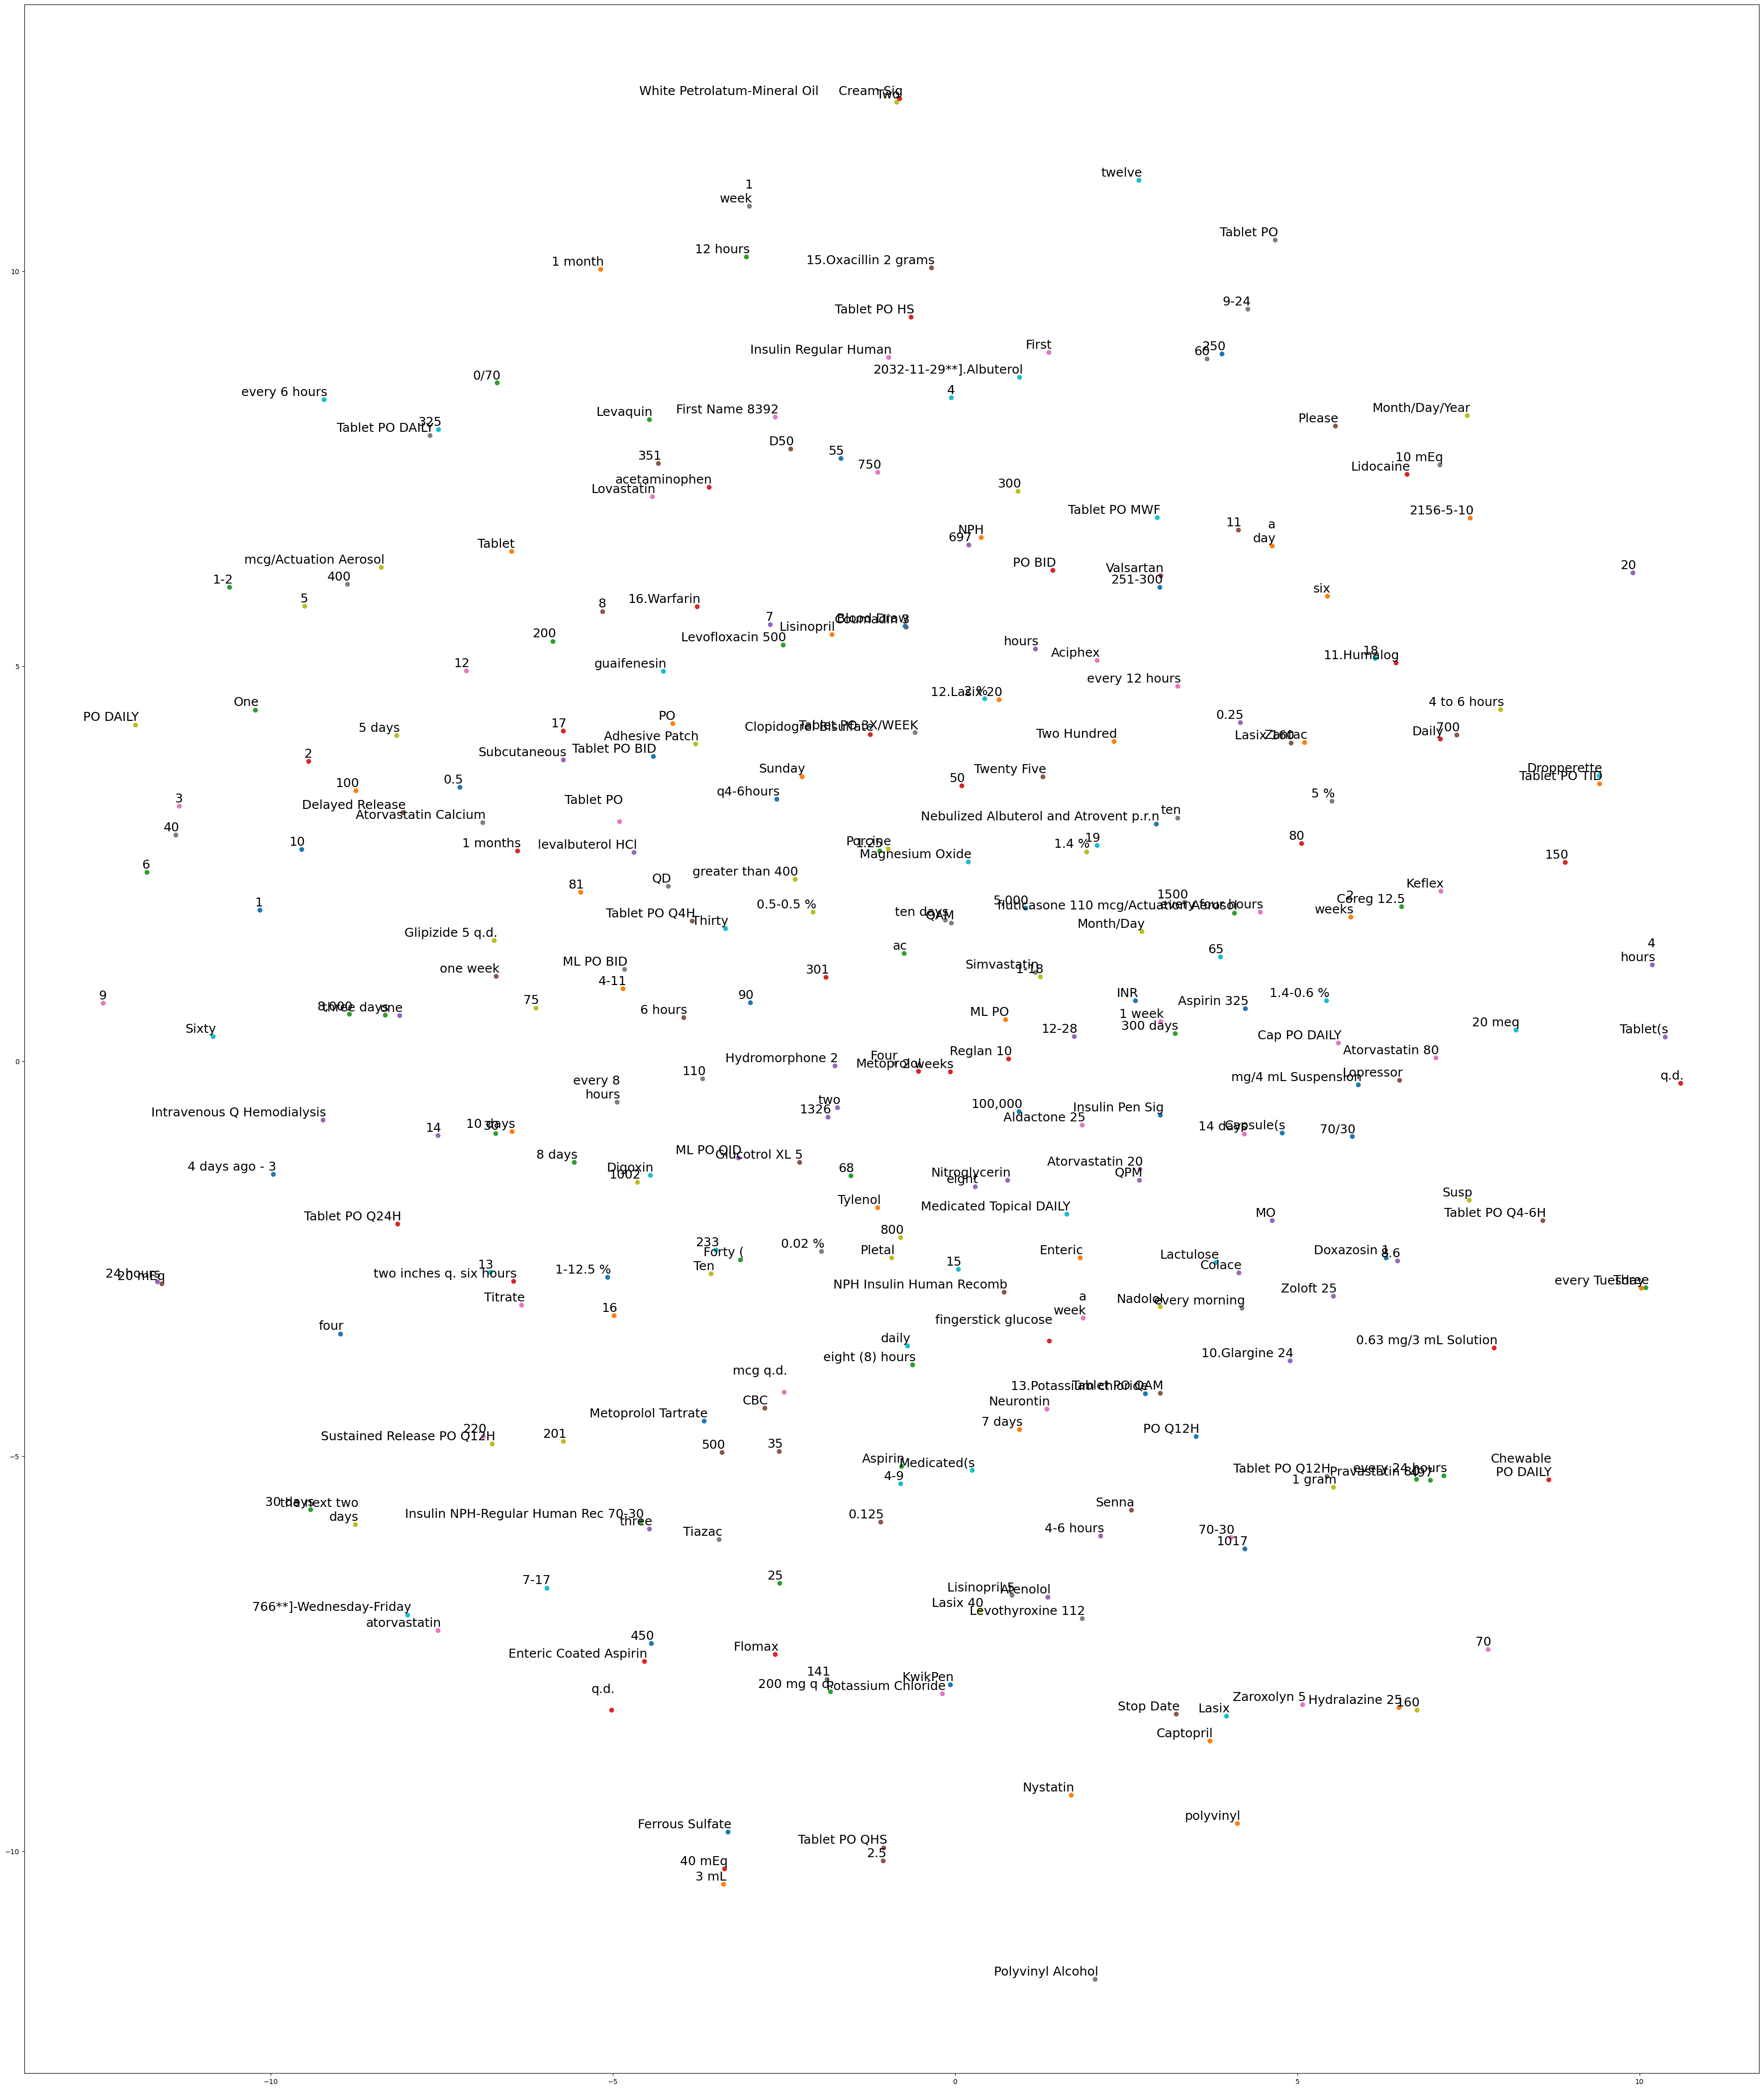

In [284]:
vocabs = model.wv.key_to_index.keys()
new_v = list(vocabs)  
tsne_plot(model, new_v)

SciSpacy

In [285]:
df =pd.read_csv("nlp_med_notes.csv")['text']
label_df=do_data_process(df,'PAST MEDICAL HISTORY')

Hepatitis C genotype 1A complicated by
cirrhosis, esophageal varices, encephalopathy and presumptive
SBP.  Type 2 diabetes.  Obesity.  Hypertension.  Asthma.
Esophageal candidiasis.  Gastroparesis.  Depression.  Status
post cholecystectomy.  Status post seven spur surgeries.
Hypothyroidism.  Amenorrhea.  Migraines.
PmHx:
HCV genotype IA refractory to IFN x 2 ascites
grade I esophageal varices (EGD [**11-1**])
h/o esophageal candidiasis
s/p ccx
DM II
HTN
asthma
hypothyroid
depression
amenorrhea
migraines
1.  Hypertension.
2.  History of hepatitis C; on pegylated interferon and
ribavirin study.  The patient quit three months ago for
unknown reasons.
3.  Dyspepsia/peptic ulcer disease.
4.  Diabetes; per OMR but the patient denies.
5.  Depression; no prior suicide attempts with few years of
treatment.
6.  Renal stones; status post renal surgery with blood
transfusions in the [**2139**].
7.  History of angina.
8.  Chronic back pain; status post surgery.
CAD, status post CABG with an EF of 2

In [286]:
import en_core_sci_md
nlp = en_core_sci_md.load()
visualize_entities(label_df)

c:\Users\ajays\anaconda3\envs\py311_cuda_env\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_sci_md' (0.5.0) was trained with spaCy v3.2.3 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


In [287]:
import en_core_sci_lg
nlp = en_core_sci_lg.load()
visualize_entities(label_df)

c:\Users\ajays\anaconda3\envs\py311_cuda_env\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_sci_lg' (0.4.0) was trained with spaCy v3.0.1 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


In [288]:
import en_ner_craft_md
nlp = en_ner_craft_md.load()
visualize_entities(label_df)

c:\Users\ajays\anaconda3\envs\py311_cuda_env\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_ner_craft_md' (0.4.0) was trained with spaCy v3.0.1 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


c:\Users\ajays\anaconda3\envs\py311_cuda_env\Lib\site-packages\spacy\displacy\__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


In [289]:
import en_ner_jnlpba_md
nlp = en_ner_jnlpba_md.load()
visualize_entities(label_df)

c:\Users\ajays\anaconda3\envs\py311_cuda_env\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_ner_jnlpba_md' (0.4.0) was trained with spaCy v3.0.1 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


In [290]:
import en_ner_bionlp13cg_md
nlp = en_ner_bionlp13cg_md.load()
visualize_entities(label_df)

c:\Users\ajays\anaconda3\envs\py311_cuda_env\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_ner_bionlp13cg_md' (0.4.0) was trained with spaCy v3.0.1 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


In [291]:
import en_ner_bc5cdr_md
nlp = en_ner_bc5cdr_md.load()
visualize_entities(label_df)

c:\Users\ajays\anaconda3\envs\py311_cuda_env\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_ner_bc5cdr_md' (0.4.0) was trained with spaCy v3.0.1 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


In [292]:
corpus=[]
for data in label_df:
    corpus.append(fetch_corpus(data))
print(list(corpus))

[['cirrhosis', 'esophageal varices', 'encephalopathy', 'diabetes', 'Obesity', 'Hypertension', 'Esophageal candidiasis', 'Gastroparesis', 'Depression', 'Hypothyroidism', 'Amenorrhea', 'Migraines'], ['PmHx:\nHCV genotype IA refractory', 'IFN', 'esophageal varices', 'esophageal candidiasis', 'ccx\nDM II\n', 'hypothyroid', 'depression', 'amenorrhea', 'migraines'], ['Hypertension', 'hepatitis C', 'pegylated interferon and\nribavirin', 'ulcer disease', 'Diabetes', 'Depression', 'Renal stones', 'angina', 'Chronic back pain'], ['CAD'], ['Hypertension'], ['chol', 'NIDDM', 'diverticulosis', 'hiatal hernia', 'obesity', 'appy'], ['Coronary artery disease', 'artery stenosis', 'CVA', 'diabetes mellitus', 'Chronic renal insufficiency', 'Hypercholesterolemia', 'Hypertension', 'GERD'], ['Coronary artery disease', 'diabetes mellitus', 'Hypertension', 'Arthritis'], ['ESRD', 'hypertensive nephrosclerosis', 'cellulitis', 'keflex', 'DM', 'glyburide', 'glipizide', 'HTN', 'clonidine', 'lisinopril', 'nifedipin

In [293]:
model1 = Word2Vec(corpus, min_count=1)
model1.wv['diabetes']

array([-4.7916281e-03, -4.3040211e-03, -4.7897627e-03, -9.8027177e-03,
       -7.7057764e-04, -7.8065521e-03, -4.7992980e-03, -7.3728259e-03,
        9.9260416e-03, -1.3484486e-03, -7.7629075e-03,  5.5125277e-03,
       -8.0538150e-03, -1.8965864e-03,  2.7289551e-03, -7.0774239e-03,
       -8.7288385e-03, -6.6570248e-03,  7.4566063e-03,  9.0327822e-03,
        4.0006167e-03,  2.4129294e-03,  4.1302340e-03, -4.0676533e-03,
        9.7515928e-03,  6.8994565e-03,  4.0974226e-03,  8.9403549e-03,
       -8.3958423e-03,  9.3439757e-04,  8.8997902e-03, -9.3729293e-04,
       -6.7275390e-03, -2.2792181e-03, -2.7847888e-03, -2.4741869e-03,
       -1.8533807e-03,  7.2817872e-03, -3.0272137e-04,  4.2164652e-03,
       -3.7532798e-03,  8.2300724e-03, -6.5083578e-03, -9.3427515e-03,
       -4.1275774e-03, -7.3578162e-03, -4.8877578e-03,  4.9568352e-04,
        2.3936923e-03,  1.7571230e-03,  5.0082742e-03, -1.4044966e-03,
        2.2781056e-03,  3.5956188e-04,  7.8417165e-03,  8.0347164e-03,
      

In [294]:
model1.wv.similar_by_word('depression')

[('lisinopril', 0.27122876048088074),
 ('Chronic back pain', 0.23388274013996124),
 ('Urolithiasis', 0.23121316730976105),
 ('depressed', 0.21400749683380127),
 ('seizures', 0.20540760457515717),
 ('pegylated interferon and\nribavirin', 0.19886018335819244),
 ('ulcer disease', 0.18231987953186035),
 ('obesity', 0.17299163341522217),
 ('.Depression', 0.15567751228809357),
 ('arthritis', 0.14508184790611267)]

c:\Users\ajays\anaconda3\envs\py311_cuda_env\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


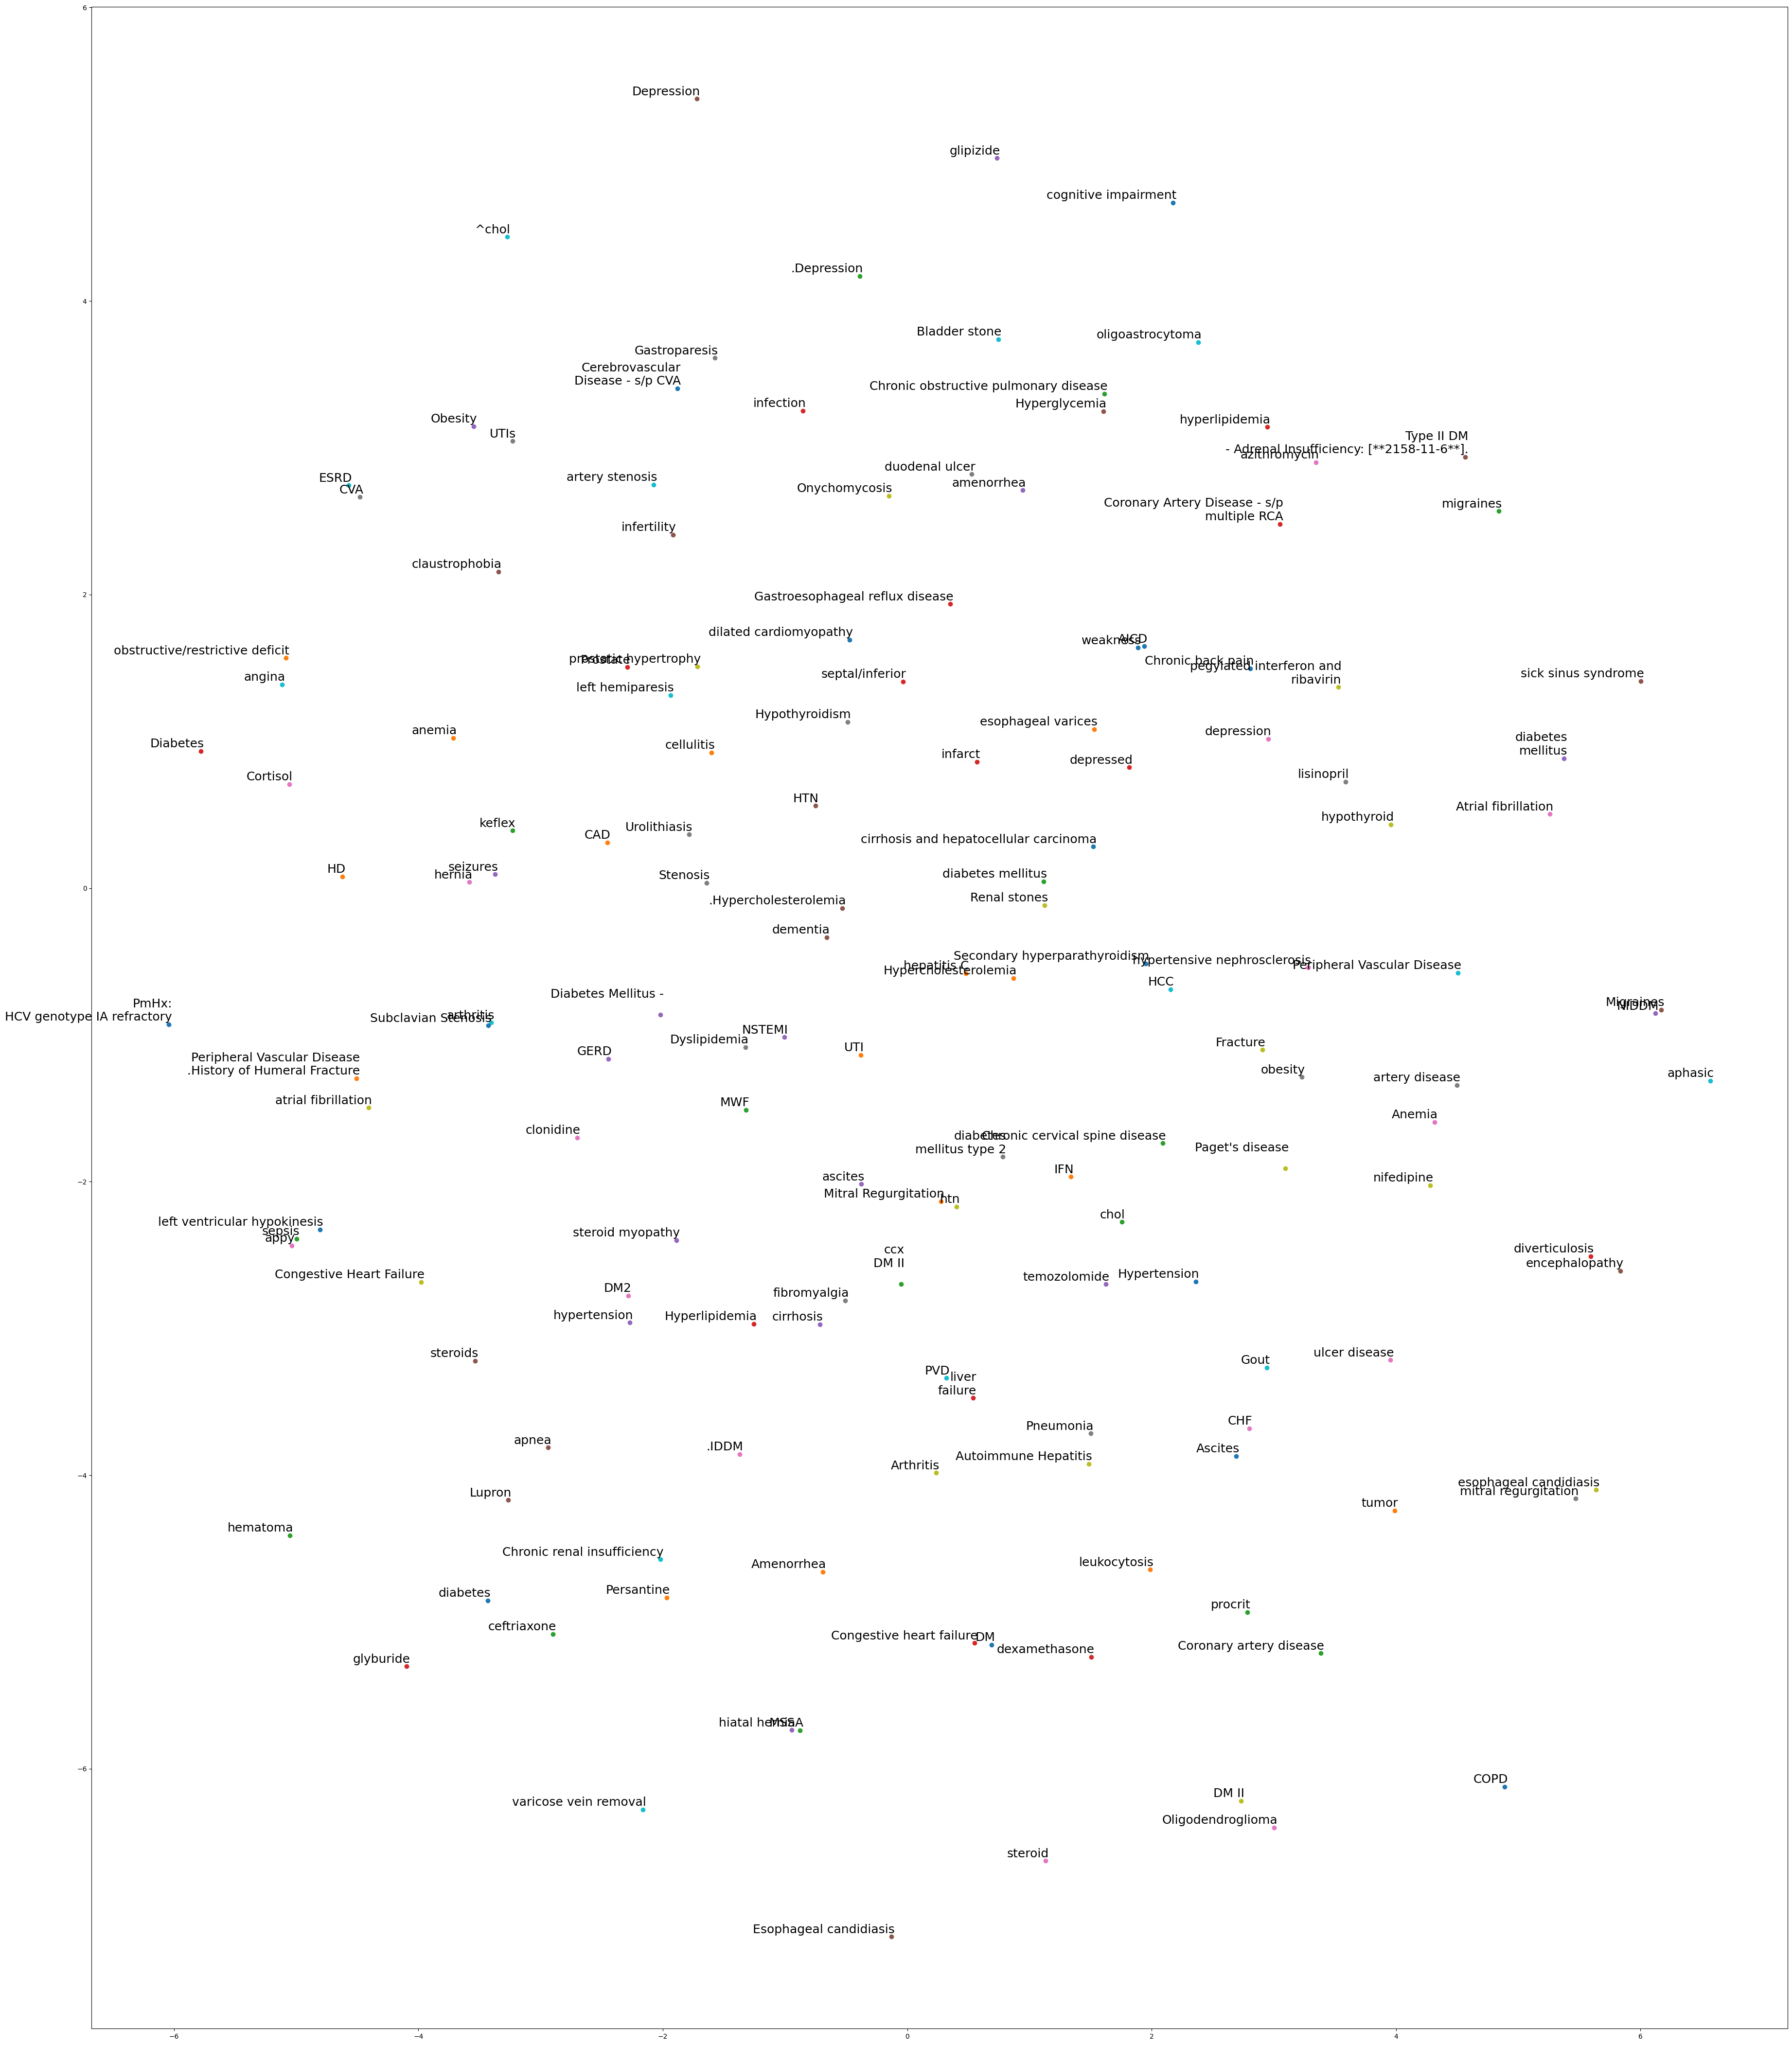

In [295]:
vocabs = model1.wv.key_to_index.keys()
new_v = list(vocabs) 
tsne_plot(model1, new_v)

In [296]:
info = api.info()  
pretrained_model= api.load("glove-wiki-gigaword-50") 

In [297]:
pretrained_model.most_similar("nausea")

[('vomiting', 0.9258869290351868),
 ('dizziness', 0.9080253839492798),
 ('diarrhea', 0.8733317852020264),
 ('constipation', 0.8657021522521973),
 ('headaches', 0.8656418323516846),
 ('insomnia', 0.8430860042572021),
 ('drowsiness', 0.8350344896316528),
 ('fatigue', 0.8220477104187012),
 ('rashes', 0.8206841349601746),
 ('aches', 0.8198308348655701)]

In [298]:
corpus_in_pretrained_model = []
for word in vocabs:
  if word in pretrained_model:
    corpus_in_pretrained_model.append(word)
  else:
    print(word) #

Hypertension
CAD
diabetes mellitus
Hyperlipidemia
GERD
Anemia
CVA
hypothyroid
Gout
DM
Hypercholesterolemia
Coronary artery disease
Diabetes
Depression
hypertensive nephrosclerosis
Dyslipidemia
Arthritis
ESRD
cirrhosis and hepatocellular carcinoma
keflex
glyburide
glipizide
HTN
PVD
Secondary hyperparathyroidism
Prostate
Lupron
Atrial fibrillation
artery disease
atrial fibrillation
esophageal varices
Congestive heart failure
NIDDM
Congestive Heart Failure
Chronic renal insufficiency
COPD
hepatitis C
DM2
diabetes
mellitus type 2
pegylated interferon and
ribavirin
^chol
PmHx:
HCV genotype IA refractory
Persantine
ccx
DM II

septal/inferior
Obesity
Migraines
ulcer disease
Gastroparesis
Renal stones
Chronic back pain
Amenorrhea
hiatal hernia
Esophageal candidiasis
Hypothyroidism
esophageal candidiasis
artery stenosis
left ventricular hypokinesis
IFN
Chronic cervical spine disease
Diabetes Mellitus -

.Hypercholesterolemia
.IDDM
Stenosis
Fracture
Peripheral Vascular Disease
Cerebrovascular
Di

c:\Users\ajays\anaconda3\envs\py311_cuda_env\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


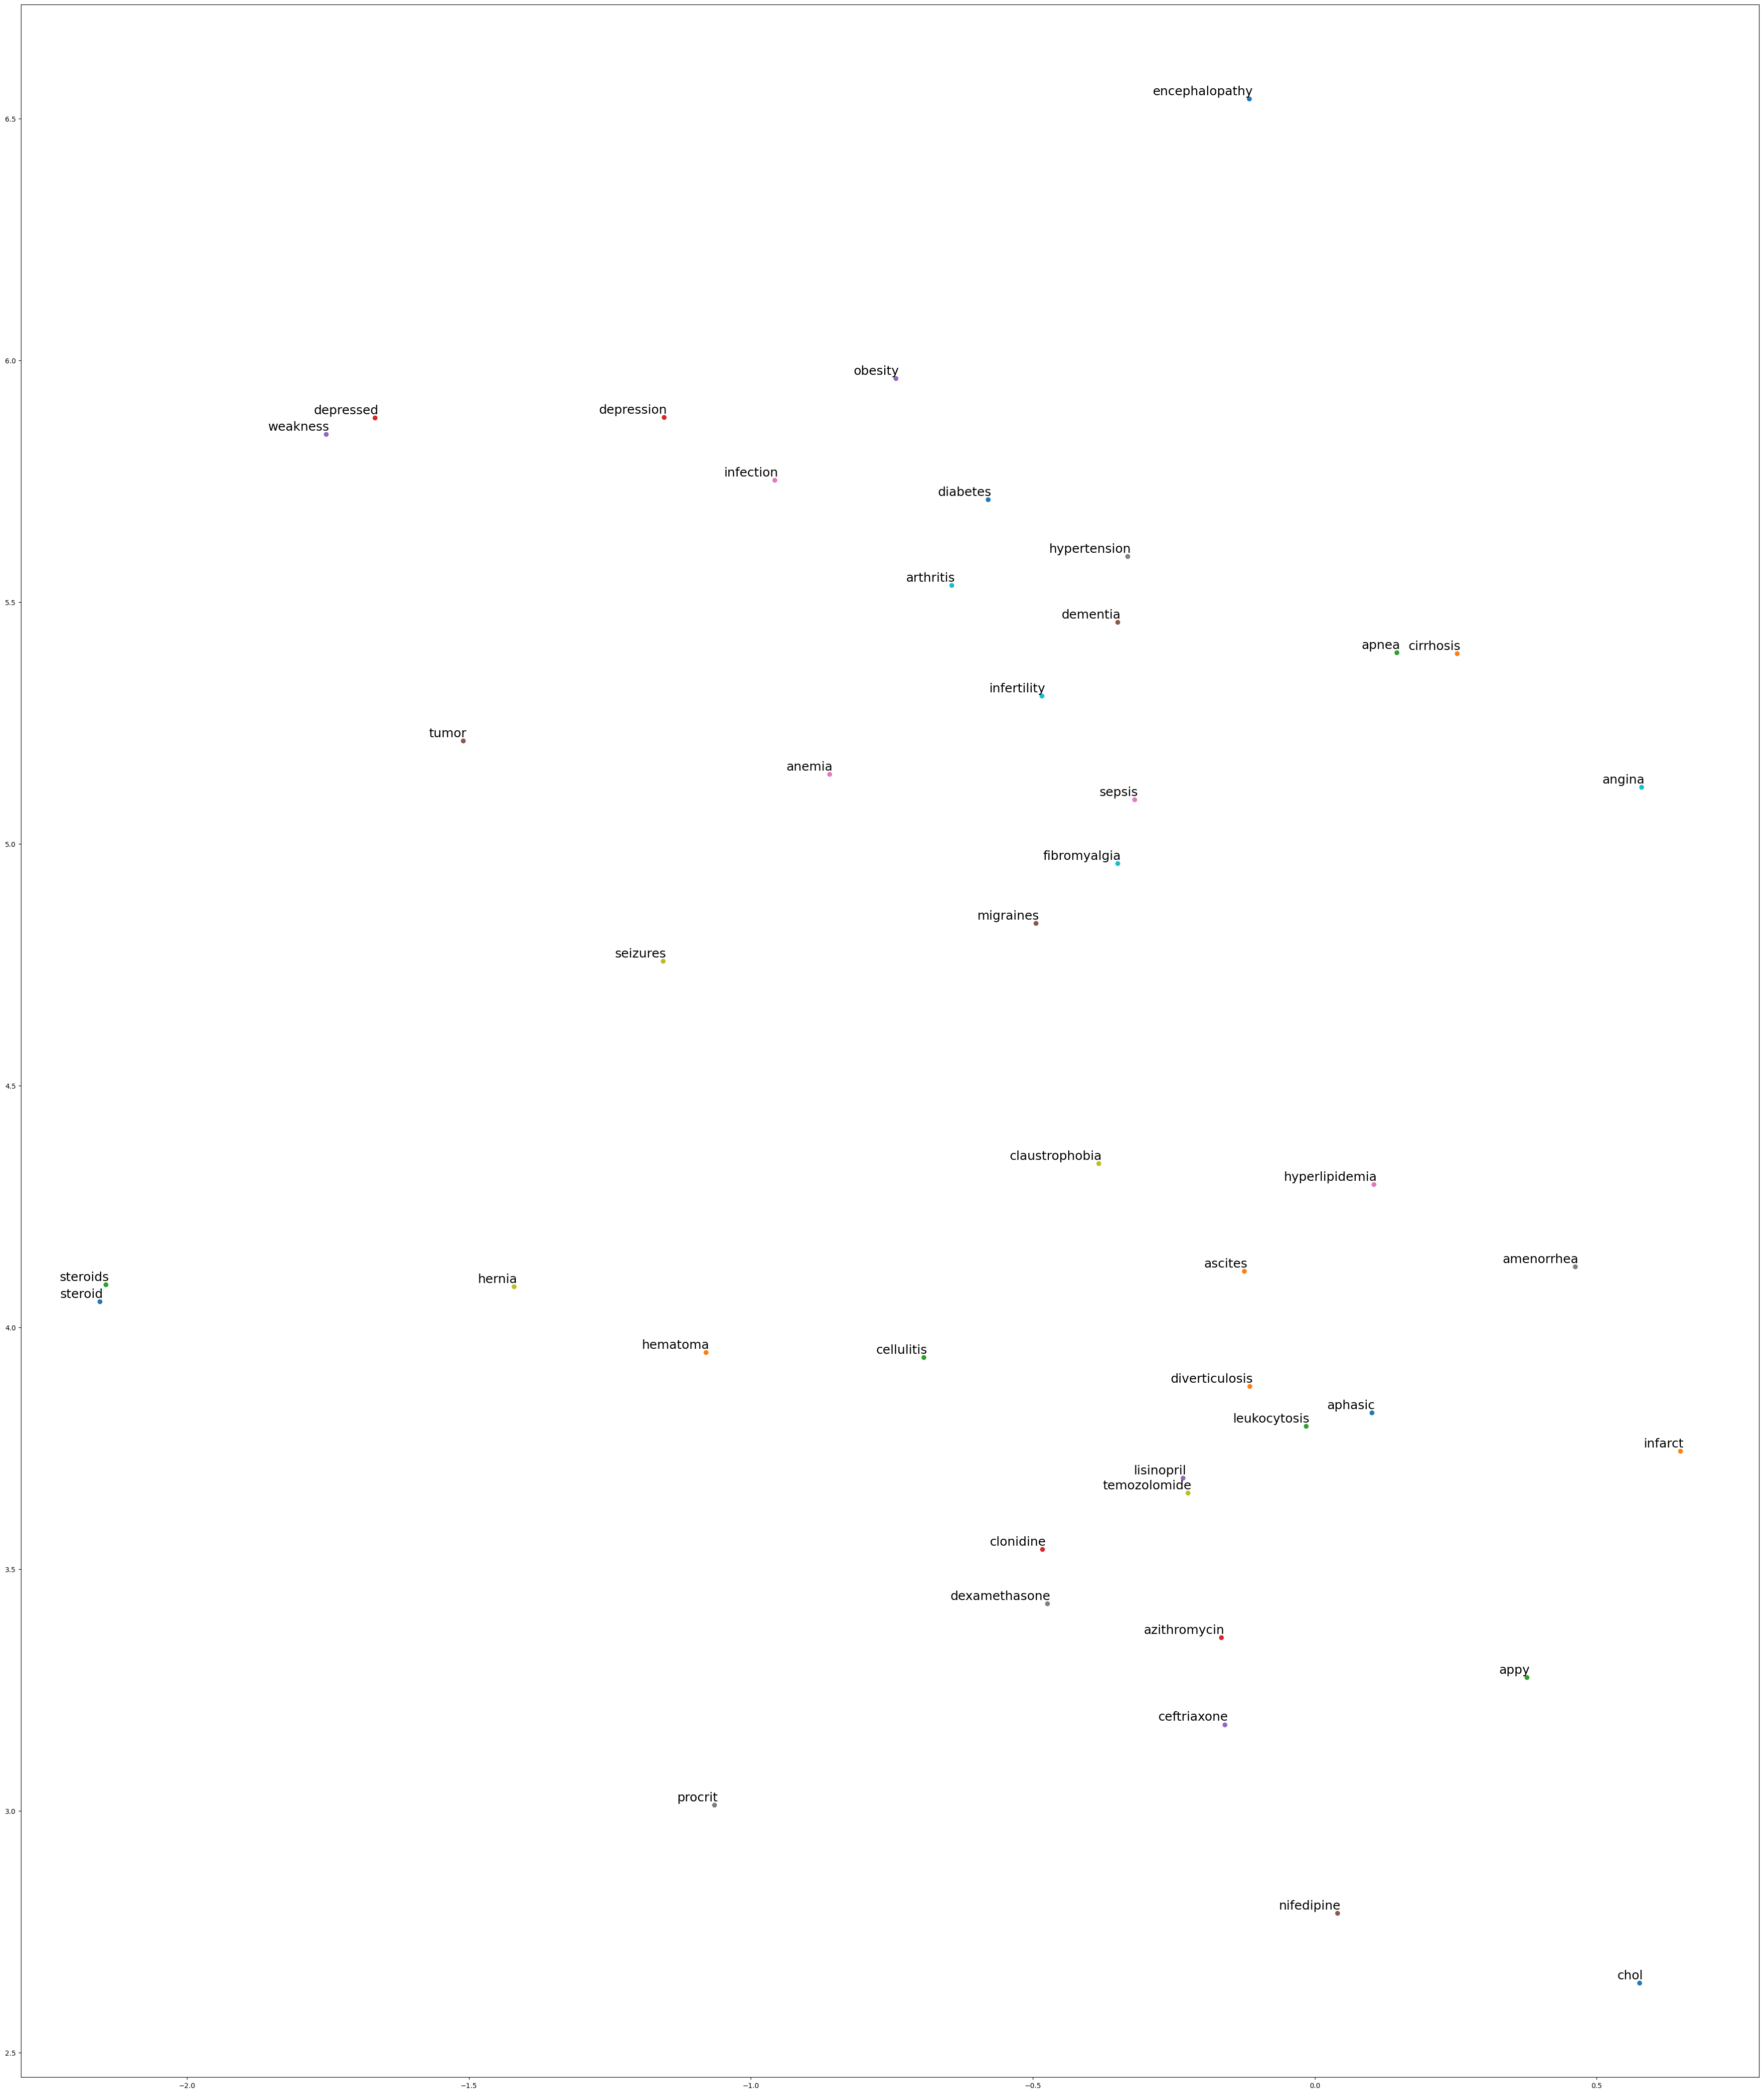

In [299]:
tsne_plot(pretrained_model,corpus_in_pretrained_model,True)

In [300]:
nlp = spacy.load("en_ner_bc5cdr_md")

c:\Users\ajays\anaconda3\envs\py311_cuda_env\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_ner_bc5cdr_md' (0.4.0) was trained with spaCy v3.0.1 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [301]:
corpus=[]
for data in label_df:
    corpus.append(fetch_corpus(data))
print(list(corpus))

[['cirrhosis', 'esophageal varices', 'encephalopathy', 'diabetes', 'Obesity', 'Hypertension', 'Esophageal candidiasis', 'Gastroparesis', 'Depression', 'Hypothyroidism', 'Amenorrhea', 'Migraines'], ['PmHx:\nHCV genotype IA refractory', 'IFN', 'esophageal varices', 'esophageal candidiasis', 'ccx\nDM II\n', 'hypothyroid', 'depression', 'amenorrhea', 'migraines'], ['Hypertension', 'hepatitis C', 'pegylated interferon and\nribavirin', 'ulcer disease', 'Diabetes', 'Depression', 'Renal stones', 'angina', 'Chronic back pain'], ['CAD'], ['Hypertension'], ['chol', 'NIDDM', 'diverticulosis', 'hiatal hernia', 'obesity', 'appy'], ['Coronary artery disease', 'artery stenosis', 'CVA', 'diabetes mellitus', 'Chronic renal insufficiency', 'Hypercholesterolemia', 'Hypertension', 'GERD'], ['Coronary artery disease', 'diabetes mellitus', 'Hypertension', 'Arthritis'], ['ESRD', 'hypertensive nephrosclerosis', 'cellulitis', 'keflex', 'DM', 'glyburide', 'glipizide', 'HTN', 'clonidine', 'lisinopril', 'nifedipin

In [302]:
model2 = Word2Vec(corpus, min_count=1)

In [303]:
model2.wv['Obesity']

array([-9.1093825e-05, -9.9241789e-03, -7.5362818e-03,  8.5708369e-03,
        1.9004995e-03, -8.2199089e-03, -8.0486789e-04,  5.4247836e-03,
       -9.3425596e-03, -6.8735187e-03, -1.0348429e-03, -9.7759021e-03,
        4.8810078e-04,  1.9610326e-03,  8.5436888e-03,  9.8833640e-04,
        1.3086309e-03,  4.8568044e-03, -4.3077054e-03,  7.1962797e-03,
        1.7345141e-04, -6.7001185e-04, -9.7062802e-03,  5.0922716e-04,
        6.7787976e-03,  1.7667776e-03, -8.1071993e-03, -3.3273427e-03,
       -6.0411347e-03,  6.0149254e-03, -6.4484845e-03,  5.2537560e-03,
       -5.2457186e-03, -6.8454114e-03, -7.5903679e-03,  3.8506659e-03,
       -8.8066710e-03, -5.7312474e-03, -7.0718583e-03, -4.3477612e-03,
       -4.0268828e-03,  1.4860929e-03,  6.4703096e-03, -1.2032894e-03,
       -5.4717297e-03,  1.5779183e-03,  5.6114192e-03, -5.2790185e-03,
       -5.3269905e-03,  5.1847291e-03,  6.2749027e-03, -7.7838628e-03,
        8.2108993e-03, -9.8271081e-03, -7.4283346e-03, -5.8667664e-03,
      

c:\Users\ajays\anaconda3\envs\py311_cuda_env\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


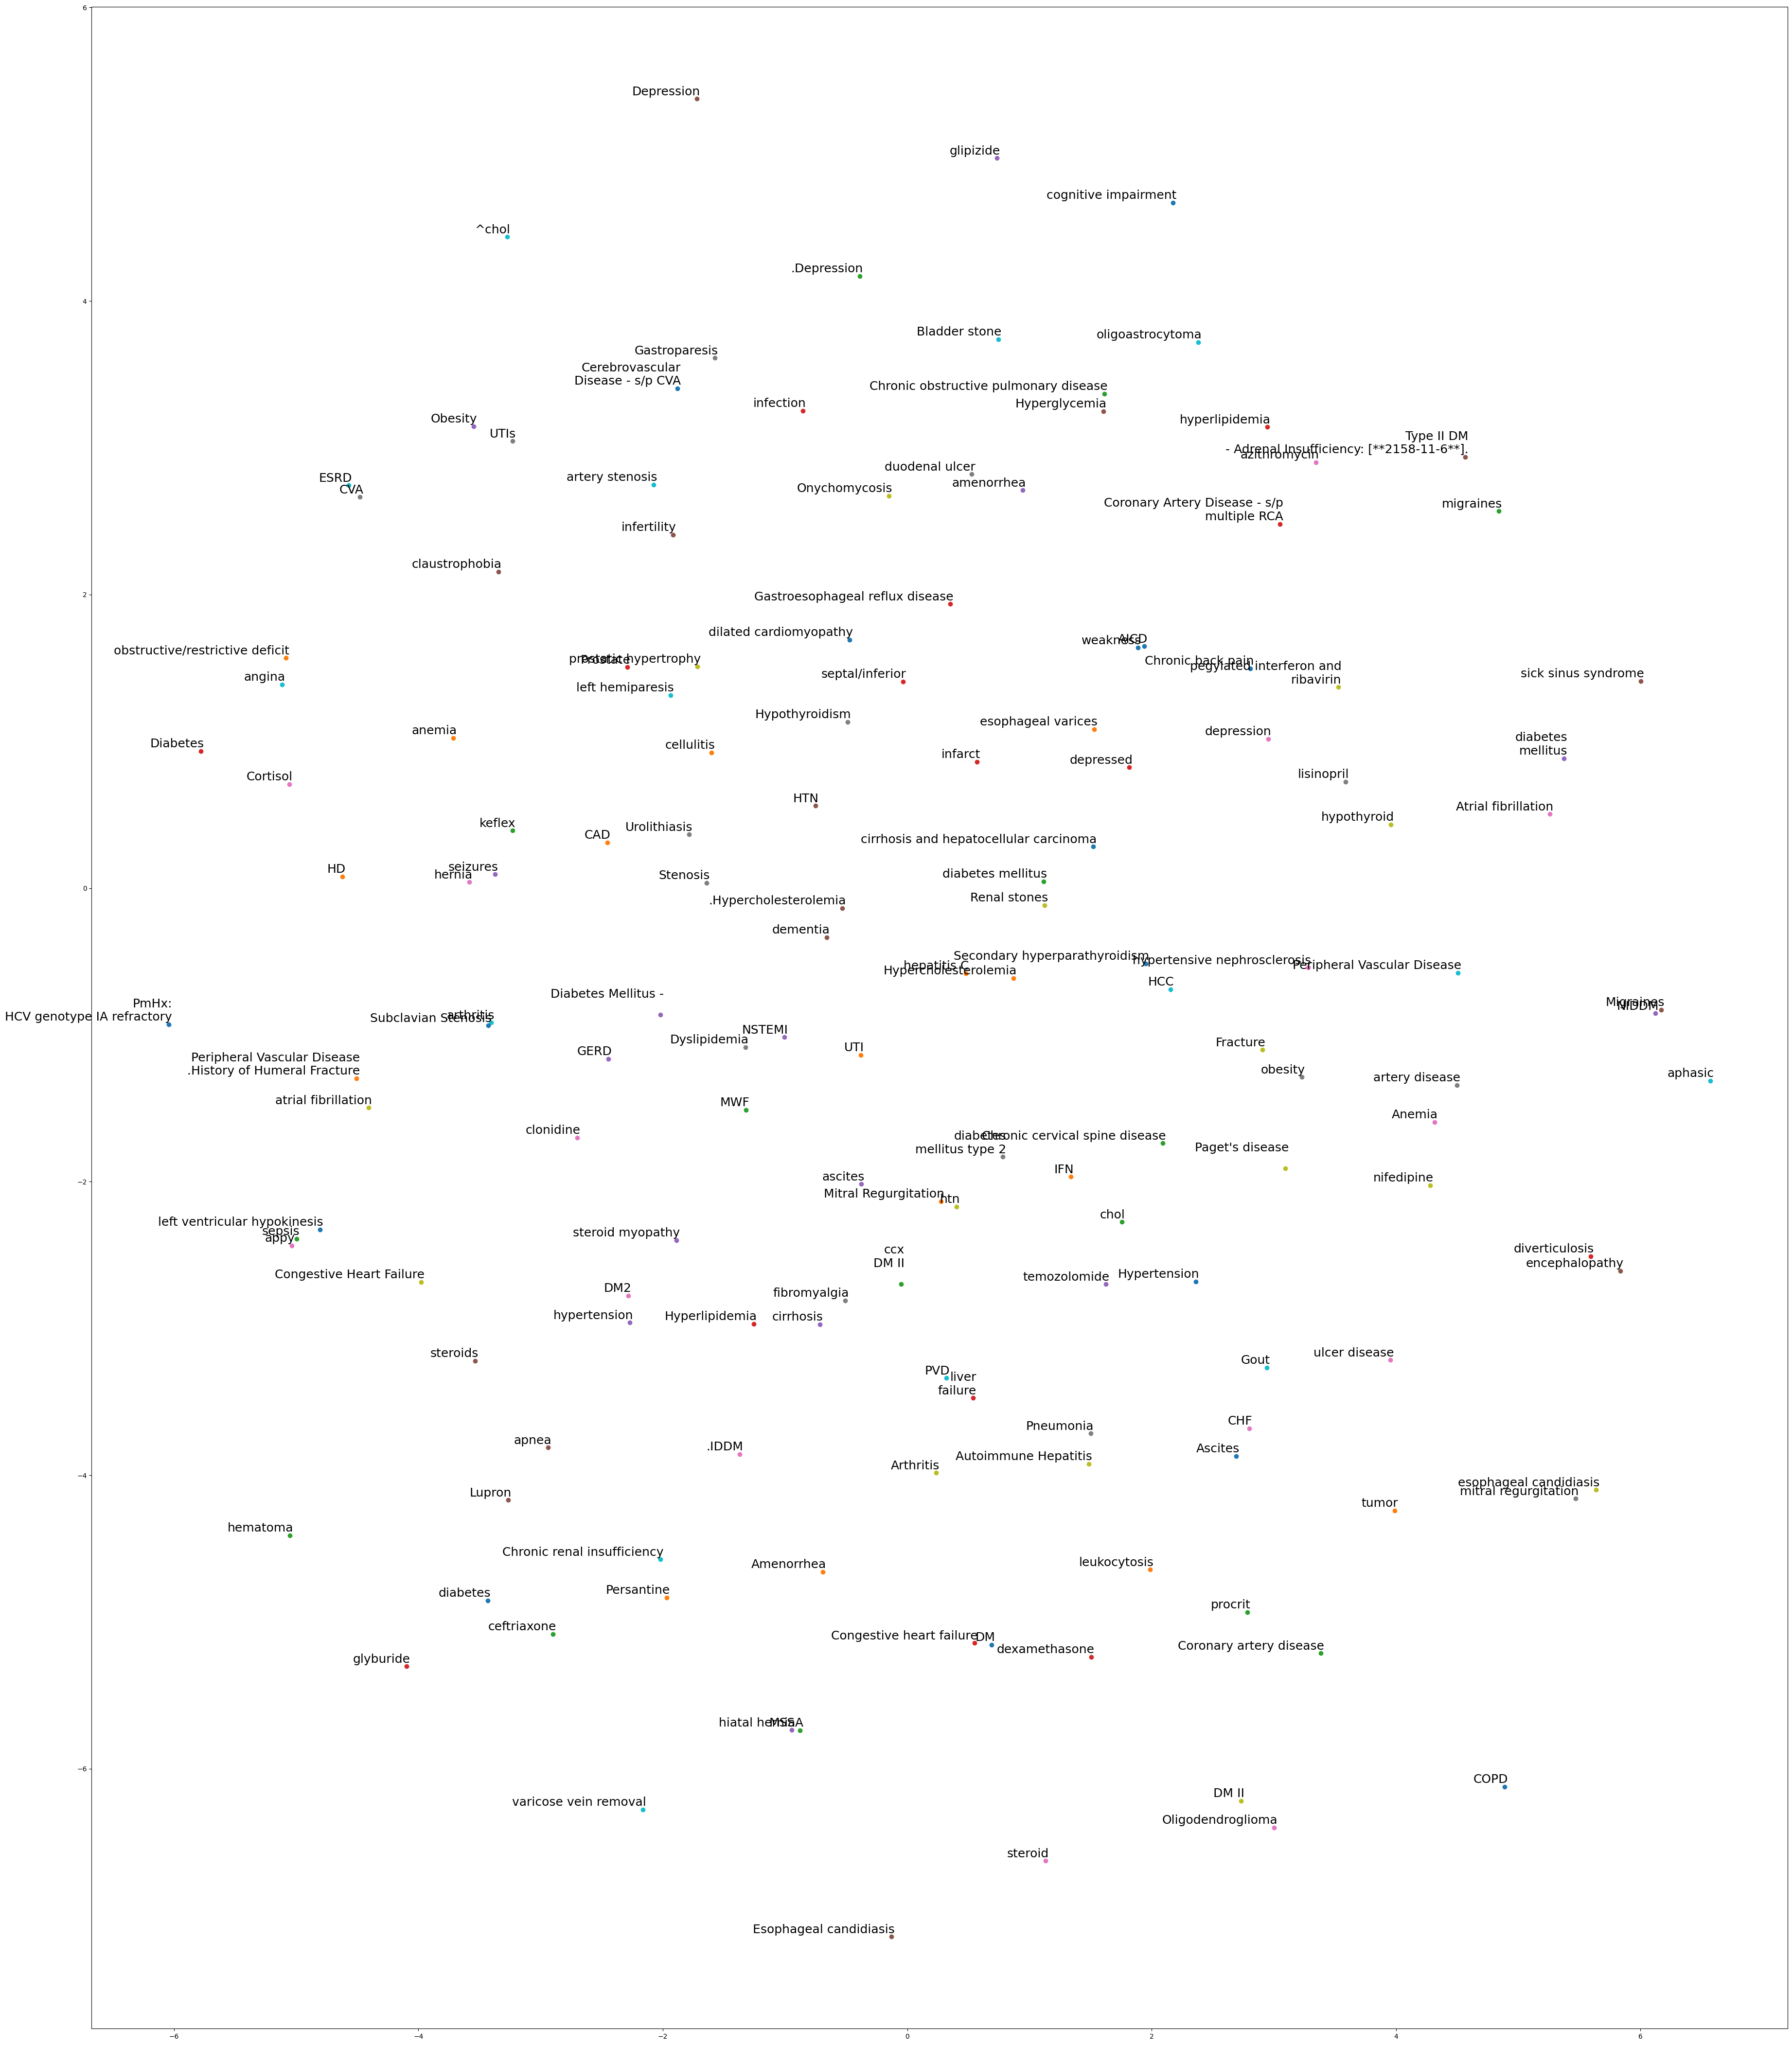

In [304]:
vocabs = model2.wv.index_to_key 
new_v = np.array(list(vocabs))
tsne_plot(model2, new_v)

c:\Users\ajays\anaconda3\envs\py311_cuda_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ajays\anaconda3\envs\py311_cuda_env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


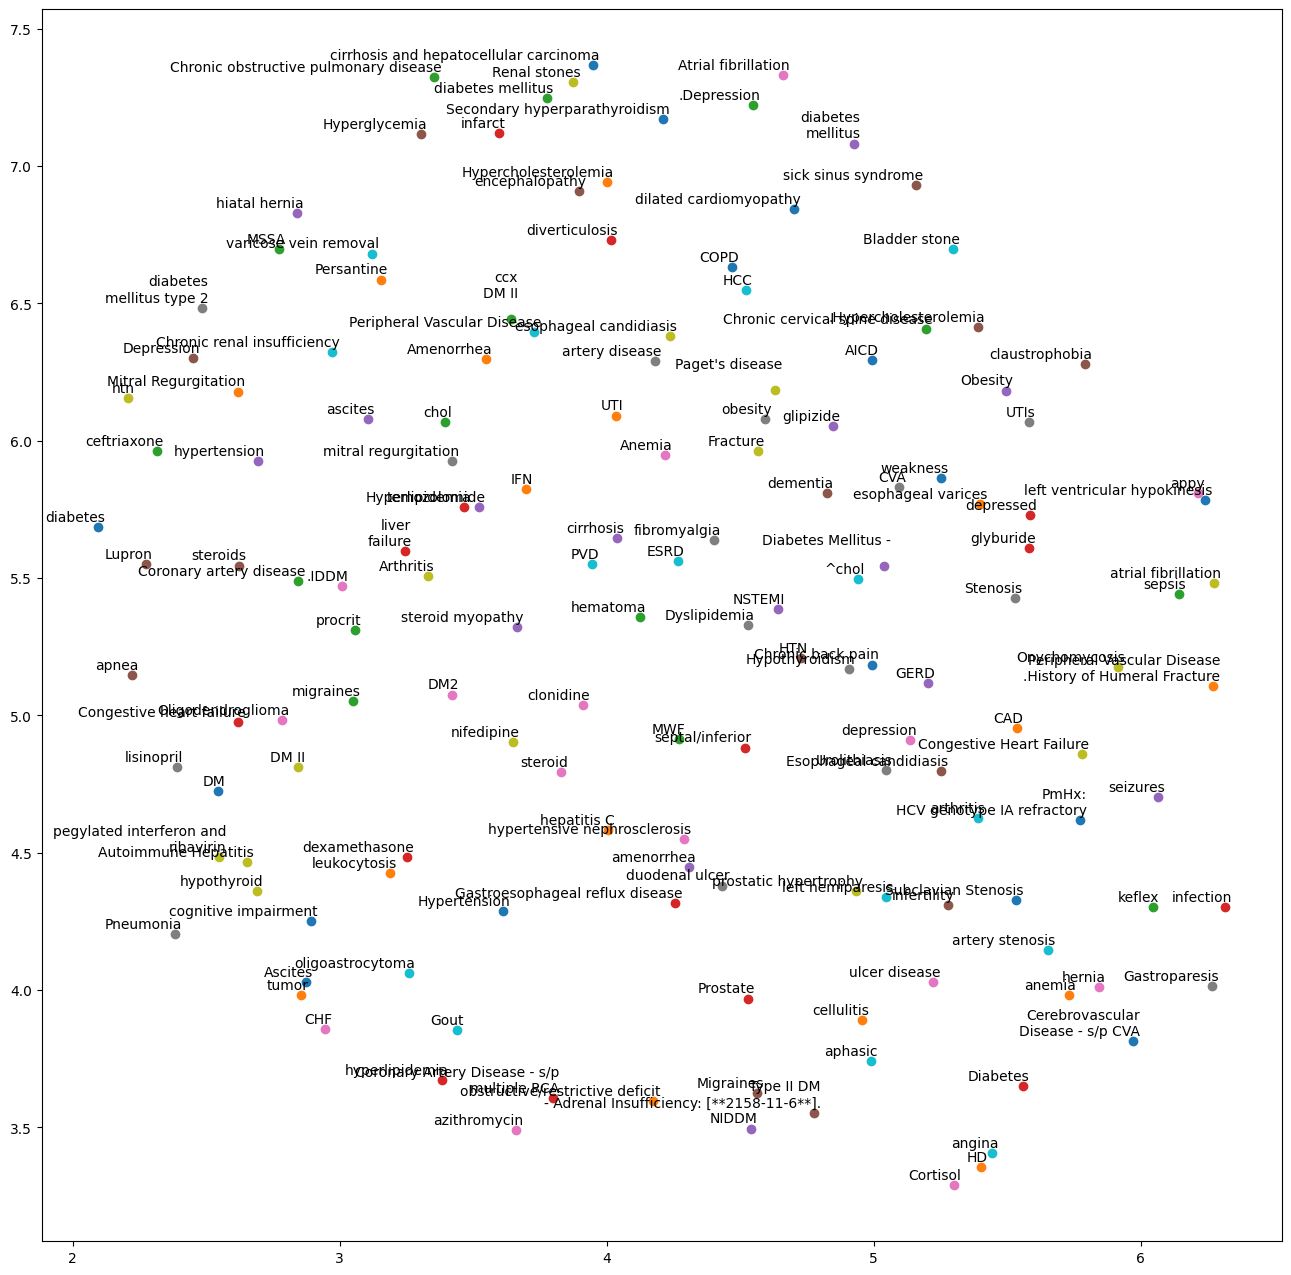

In [305]:
import numpy as np
import umap
import matplotlib.pyplot as plt

def umap_plot(model, words):
    labels = []
    tokens = []

    for word in words:
        tokens.append(model.wv[word])
        labels.append(word)


    tokens = np.array(tokens)

    umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    new_values = umap_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

vocabs = model1.wv.key_to_index.keys()
new_v = list(vocabs) 
umap_plot(model1, new_v)

Clinical Bert

In [306]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model = AutoModelForTokenClassification.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


In [307]:
df =pd.read_csv("nlp_med_notes.csv")['text']
label_df=do_data_process(df,'PHYSICAL EXAMINATION')
# len(label_df)

The patient's temperature was 98.5,
pulse 96, BP 95/48, respiratory rate 16, sating 98 percent on
3 liters.  In general, she was a pleasant, middle aged woman
lying in no acute distress.  Head and neck exams showed
normocephalic, atraumatic head with pupils equal, round, and
reactive to light and accommodation.  Extraocular movements
intact.  Oropharynx was slightly dry.  On neck exam she had a
right central venous line with mild ooze.  Heart was
tachycardiac with regular rhythm, no murmurs.  Lungs were
clear to auscultation bilaterally anteriorly.  Abdomen was
soft, nondistended, nontender with active bowel sounds.  She
had guaiac positive stool.  Extremities had 2+ edema to the
knees.  On neuro exam she was alert and oriented times three.
Cranial nerves II-XII were grossly intact.  Strength and
sensation were grossly intact.
The patient is comfortable appearing,
in no apparent distress. Vital signs: Temperature 99.1, pulse
72, blood pressure 144/87. Pulse oximetry is 98% on room air.

In [308]:
for data in label_df:
    value=nlp(data)
    print(value)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[{'entity': 'LABEL_1', 'score': 0.81048995, 'index': 1, 'word': 'the', 'start': 0, 'end': 3}, {'entity': 'LABEL_1', 'score': 0.69438756, 'index': 2, 'word': 'patient', 'start': 4, 'end': 11}, {'entity': 'LABEL_1', 'score': 0.7605704, 'index': 3, 'word': "'", 'start': 11, 'end': 12}, {'entity': 'LABEL_1', 'score': 0.675474, 'index': 4, 'word': 's', 'start': 12, 'end': 13}, {'entity': 'LABEL_1', 'score': 0.56469905, 'index': 5, 'word': 'temperature', 'start': 14, 'end': 25}, {'entity': 'LABEL_1', 'score': 0.59849, 'index': 6, 'word': 'was', 'start': 26, 'end': 29}, {'entity': 'LABEL_1', 'score': 0.5637136, 'index': 7, 'word': '98', 'start': 30, 'end': 32}, {'entity': 'LABEL_1', 'score': 0.619518, 'index': 8, 'word': '.', 'start': 32, 'end': 33}, {'entity': 'LABEL_1', 'score': 0.8101884, 'index': 9, 'word': '5', 'start': 33, 'end': 34}, {'entity': 'LABEL_1', 'score': 0.66507703, 'index': 10, 'word': ',', 'start': 34, 'end': 35}, {'entity': 'LABEL_1', 'score': 0.5779114, 'index': 11, 'word

In [309]:
df =pd.read_csv("nlp_med_notes.csv")['text']
label_df=do_data_process(df,'Physical Exam')
len(label_df)

97.9   120/50   102   22   94% 2L
Temperature 103, heart rate 116--sinus
tachycardia, blood pressure 100/47, respiratory rate 30, O2
sat 97 percent on 2 liters nasal prongs.  Neuro:  Alert and
oriented x 3, moves all extremities, follows commands,
nonfocal exam.  Respiratory:  Clear to auscultation with a
sucking chest wound.  Cardiovascular:  Regular rate and
rhythm.  Sternum with surrounding erythema of about 10 cm,
with a positive click.  Small draining hole in midincision
with milky serous drainage.  Staples remain in place.
Abdomen is soft, nontender, nondistended with normoactive
bowel sounds.  Extremities are warm and well-perfused with no
edema.  Right calf with a healing wound and minimal erythema.
Left knee with an endoscopic site that is healing, open to
air, clean and dry.
HR 88 RR 16  BP 106/60
5'3"  195#
NAD
no jaundice
EOMI, carotid bruits versus transmitted AS murmur
CTAB
3/6 SEM radiates throughout precordium
abdomen midline scar
2+ radial/DP/PT pulses  RKR scar
no var

22

In [310]:
tokenized_notes = [word_tokenize(text.lower()) for text in label_df]

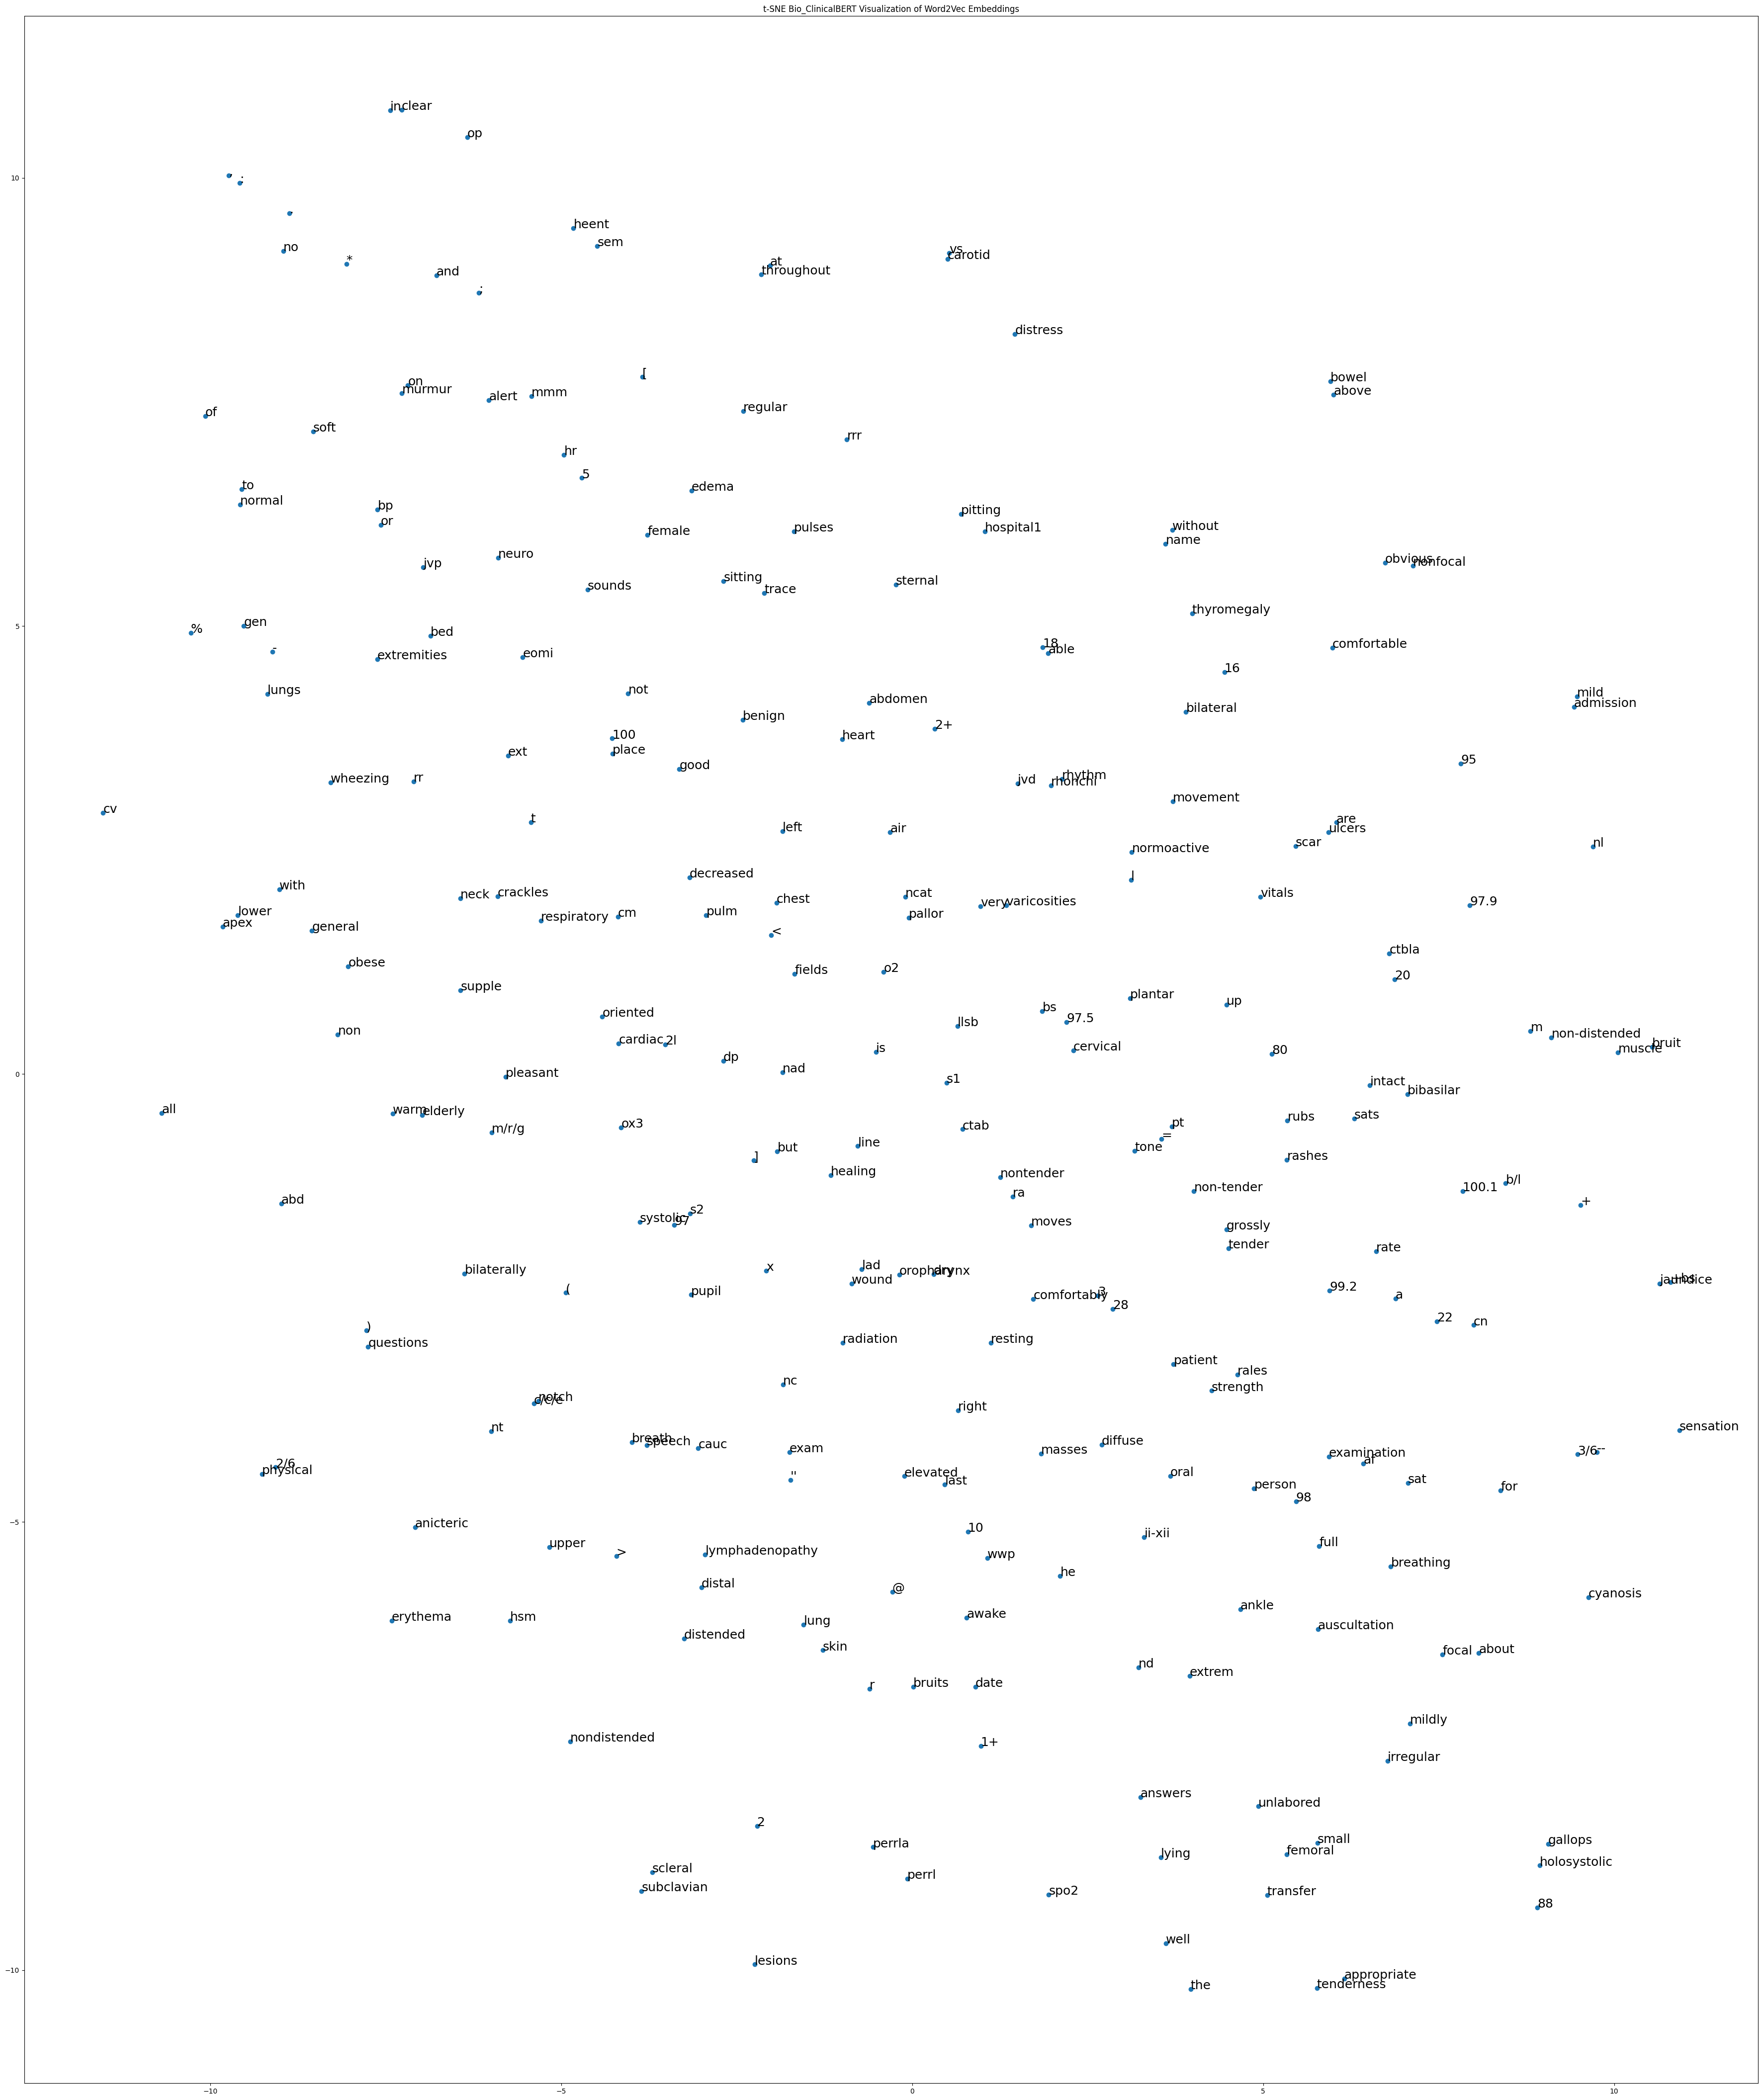

In [311]:
model = Word2Vec(sentences=tokenized_notes, vector_size=100, window=5, min_count=2, workers=4)

words = list(model.wv.key_to_index.keys())
embeddings = [model.wv[word] for word in words]

embeddings_array = np.array(embeddings)

tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_array)

plt.figure(figsize=(45, 54))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=18)
plt.title("t-SNE Bio_ClinicalBERT Visualization of Word2Vec Embeddings")
plt.show()